# Creating Table1

In [44]:
from ClinicalDocumentUtils import Database
from ClinicalDocumentUtils import TableOne as table1
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

Connect to the database in the typical fashion

In [45]:
d = Database()

Connect To Database


encryption key: ········


Connected: {'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'clinical', 'host': 'clinical_db', 'port': '5432', 'options': '-c search_path=clinical_document,public', 'sslmode': 'require', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'}


## Get list of projects and their UUID

In [46]:
d.fetch_projects()

,name,description,uuid
0,test,test,b544d4ef-d8ed-471f-b7fc-f258aa6c6198


### Set Project UUID

In [47]:
d.set_project_uuid('b544d4ef-d8ed-471f-b7fc-f258aa6c6198')

project_uuid: b544d4ef-d8ed-471f-b7fc-f258aa6c6198


# Generate list of MRNs
Find patiens that meets the following parameters \
tag: 'diagnosis' \
attribute: 'diagnosis' \
attribute's value: 'c61 - Malignant neoplasm of prostate'

In [48]:
patient_filter=[{'tag': 'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']}]

print(f"{patient_filter=}")
mrns = d.get_mrns_where_filters(patient_filter)
print(f"mrns:{mrns}")

patient_filter=[{'tag': 'diagnosis', 'attribute': 'diagnosis', 'value': ['c61 - Malignant neoplasm of prostate']}]
mrns:['333333', '888888', '111111', '555555', '666666', '777777']


# Age Distribution
Ages are calculated based on tag: 'dob' and a reference tag. \
We need a reference tag because we need to specify to calculate age. \
The reference_tag may have multiple occurances. For example, if the reference tag is 'c61:external-radiation', radiation may occur once with localized prostate cancer, and then again if he has oligometastatic cancer. \
<br>
The result is a list of numbers representing years of age. A 'None' output means either the dob or reference_tag is not present or valid.

In [49]:
# Tag used to calculate patient's age
reference_tag = 'c61:external-radiation'
occurance = 0 # First occurance of external-radiation
ages = table1.age_distribution(d, mrns, reference_tag, reference_occurance=0)
print(f"{mrns=}")
print(f"{ages=}")

mrns=['333333', '888888', '111111', '555555', '666666', '777777']
ages=[74.32328767123288, -9.345205479452055, 66.7041095890411, None, None, 57.68767123287671]


# Tag Distribution
Gets a list of tag-attribute values, exactly 1 per patient. 

In [50]:
icd10_tag = 'c61:pT'
attribute = 'pT'
occurance = 0
values = table1.tag_distribution_by_occurance(d, mrns, icd10_tag, attribute, occurance)

print(f"{mrns=}")
print(f"{values=}")

mrns=['333333', '888888', '111111', '555555', '666666', '777777']
values=['T3a', None, 'T2c', 'T2a', 'T3a', 'T2c']


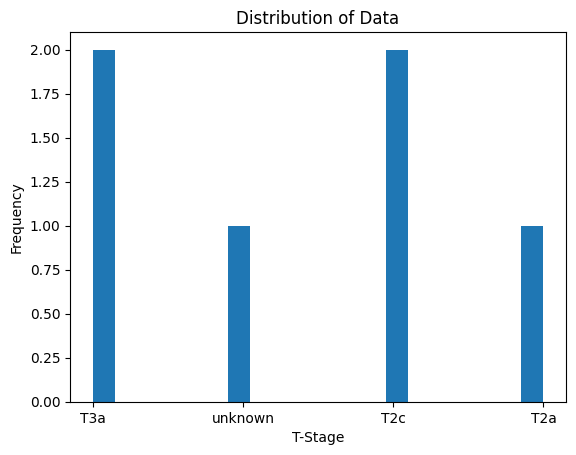

In [51]:
# Remove None Values
values = ['unknown' if i is None else i for i in values]

# Title and labels
plt.title('Distribution of Data')
plt.xlabel('T-Stage')
plt.ylabel('Frequency')
# Create a histogram
plt.hist(values, bins=20)
# Show the plot
plt.show()

## Tags with mulitple occurances
Some tags have multiple occurances, so you need to specify which one to present in the list.
If you want the first occurance of psa, then make occurance = 0;
If you want the second occurance of psa, then make occurance = 1;

In [52]:
icd10_tag = 'c61:psa'
attribute = 'psa'
occurance = 1
values = table1.tag_distribution_by_occurance(d, mrns, icd10_tag, attribute, occurance)

print(f"{mrns=}")
print(f"{values=}")

mrns=['333333', '888888', '111111', '555555', '666666', '777777']
values=['0.8', 0.071, '0', 0.014, 2.22, 5.89]


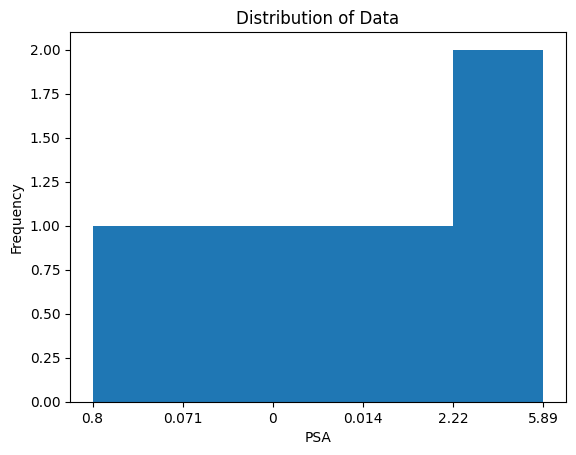

In [53]:
values = ['unknown' if i is None else i for i in values]

# Title and labels
plt.title('Distribution of Data')
plt.xlabel('PSA')
plt.ylabel('Frequency')
# Create a histogram
plt.hist(values, bins=5)
# Show the plot
plt.show()

## Tags with mulitple occurances
Some tags have multiple occurances, so you need to specify which one to present in the list. \
If you want the occurance of psa closest to the tag 'c61:surgery'

In [54]:
icd10_tag = 'c61:psa'
attribute = 'psa'
reference_icd10_tag = 'c61:surgery'
reference_occurance = 0
values = table1.tag_distribution_by_association(d, mrns, icd10_tag, attribute, reference_icd10_tag, reference_occurance)
print(f"{mrns=}")
print(f"{values=}")

mrns=['333333', '888888', '111111', '555555', '666666', '777777']
values=['0.8', None, '0.28', 4.6, 0.87, 5.89]
